# Convolutional Neural Network

## Packages

In [84]:
# ----- Tensorflow -----
import tensorflow as tf
from keras.models import Model
from keras.layers import Flatten, Dense, Input
from keras import optimizers as opt

# ----- Transfer learning -----
from keras.applications import NASNetLarge
from keras.applications import EfficientNetB0
from keras.applications import MobileNetV2

# ----- plot -----
import matplotlib.pyplot as plt

# ----- Utility functions -----
from utils import load_data, plot_hist, plot_hist_sideways, _convert_sample, get_features_and_labels, preprocess_data, augment_layer

# ------ Data ------
import numpy as np


## Load Data

In [85]:
data_dir = "D:/OneDrive - Syddansk Universitet/kandidat/3_semester/Maskinlæring/ds807_anvendt_maskinlæring/eksamen/exam/patch_camelyon"
BATCH_SIZE = 32
train, test, val = load_data(data_dir, perc=10, batch_size=BATCH_SIZE)

## Transfer Learning
- Discuss and apply transfer learning. Motivate what type of transfer learning you use and how you apply it, including considerations for how to prepare the data for this. Here, be sure to visualize plots of train and validation losses and accuracies.



## Feature Extraction - 1 pass
For the feature extraction approach, we will utilize a large network, since we do not have to train it, we can utilize its size and save computational ressources. In this case we are using NasNetLarge, since it is one of the best performing models in terms of accuracy for image classification. However, it is a HUGE model, and will take time to even load.
However, we will also try with mobilenet v2 since it has been trained on 96 x 96 pixel images

### Helper Functions

In [86]:
# Hyperparams
EPOCHS = 50
LEARNING_RATE = 0.001
OPTIMIZER = opt.Nadam(learning_rate = LEARNING_RATE)

### Build Feature Extractor with NasNet Large

#### Feature Extractor

In [87]:
# Initilize NasNetLarge Feature Extractor
NasNet_ft_extractor = NASNetLarge(
    input_shape=(96, 96, 3),
    include_top= False,
    weights='imagenet'
)
NasNet_ft_extractor.trainable = False

#### Classifier

In [88]:
# Build classifer
x = NasNet_ft_extractor.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
m_nasnet = Model(inputs = NasNet_ft_extractor.output, outputs = output)

# Compile model
m_nasnet.compile(
    optimizer = OPTIMIZER,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

#### Extract Features

In [89]:
# X features
nasnet_fts_train, y_train = get_features_and_labels(train, NasNet_ft_extractor, tf.keras.applications.efficientnet.preprocess_input)
nasnet_fts_val, y_val = get_features_and_labels(val, NasNet_ft_extractor, tf.keras.applications.efficientnet.preprocess_input)

1/1 [==============================] - 0s 361ms/step


#### Train model with Nasnet Features

In [90]:
history_nasnet = m_nasnet.fit(x = nasnet_fts_train, y = y_train, validation_data = (nasnet_fts_val, y_val), epochs = EPOCHS, batch_size = BATCH_SIZE)


Epoch 1/25
820/820 [==============================] - 53s 63ms/step - loss: 0.5271 - accuracy: 0.7512 - val_loss: 0.5201 - val_accuracy: 0.7409
Epoch 2/25
820/820 [==============================] - 48s 58ms/step - loss: 0.3841 - accuracy: 0.8272 - val_loss: 0.5575 - val_accuracy: 0.7336
Epoch 3/25
820/820 [==============================] - 47s 57ms/step - loss: 0.2877 - accuracy: 0.8776 - val_loss: 0.6061 - val_accuracy: 0.7385
Epoch 4/25
820/820 [==============================] - 49s 60ms/step - loss: 0.2057 - accuracy: 0.9190 - val_loss: 0.7175 - val_accuracy: 0.7251
Epoch 5/25
820/820 [==============================] - 50s 62ms/step - loss: 0.1335 - accuracy: 0.9516 - val_loss: 0.8785 - val_accuracy: 0.7019
Epoch 6/25
820/820 [==============================] - 55s 66ms/step - loss: 0.0881 - accuracy: 0.9725 - val_loss: 0.9583 - val_accuracy: 0.7199
Epoch 7/25
820/820 [==============================] - 47s 58ms/step - loss: 0.0588 - accuracy: 0.9850 - val_loss: 1.1519 - val_accuracy:

### Feature extractor with MobileNetV2

#### Feature Extractor

In [91]:
# Layers for feature extraction
mobilev2_ft_extractor = MobileNetV2(
    input_shape=(96, 96, 3),
    include_top= False,
    weights='imagenet'
)
mobilev2_ft_extractor.trainable = False

#### Classifier

In [92]:
# Full model
x = mobilev2_ft_extractor.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
m_mobilev2 = Model(inputs = mobilev2_ft_extractor.output, outputs = output)

# Compile model
m_mobilev2.compile(
    optimizer = OPTIMIZER,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

#### Extract Features

In [95]:
# Extract Features
mobilev2_fts_train, y_train = get_features_and_labels(train, mobilev2_ft_extractor, tf.keras.applications.mobilenet_v2.preprocess_input)
mobilev2_fts_val, y_val = get_features_and_labels(val, mobilev2_ft_extractor, tf.keras.applications.mobilenet_v2.preprocess_input)

1/1 [==============================] - 0s 62ms/step


#### Train model with mobilev2 features

In [96]:
history_mobile_v2 = m_mobilev2.fit(x = mobilev2_fts_train, y = y_train, validation_data = (mobilev2_fts_val, y_val), epochs = EPOCHS, batch_size = BATCH_SIZE)

Epoch 1/10
820/820 [==============================] - 14s 16ms/step - loss: 0.7353 - accuracy: 0.5005 - val_loss: 0.6934 - val_accuracy: 0.4931
Epoch 2/10
820/820 [==============================] - 13s 16ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.4931
Epoch 3/10
820/820 [==============================] - 14s 18ms/step - loss: 0.6932 - accuracy: 0.4956 - val_loss: 0.6932 - val_accuracy: 0.4931
Epoch 4/10
820/820 [==============================] - 12s 14ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4931
Epoch 5/10
820/820 [==============================] - 13s 15ms/step - loss: 0.6932 - accuracy: 0.4945 - val_loss: 0.6931 - val_accuracy: 0.5069
Epoch 6/10
820/820 [==============================] - 12s 15ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6933 - val_accuracy: 0.4931
Epoch 7/10
820/820 [==============================] - 13s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy:

### Feature extractor with EfficientNet B0

#### Feature extractor

In [97]:
# Layers for feature extraction
efficient_ft_extractor = EfficientNetB0(
    input_shape=(96, 96, 3),
    include_top= False,
    weights='imagenet'
)
efficient_ft_extractor.trainable = False

#### Classifier

In [98]:
# Full model
x = efficient_ft_extractor.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
m_efficient = Model(inputs = efficient_ft_extractor.output, outputs = output)

# Compile model
m_efficient.compile(
    optimizer = OPTIMIZER,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

#### Extract Features

In [101]:
# X features
efficient_fts_train, y_val = get_features_and_labels(train, efficient_ft_extractor, tf.keras.applications.efficientnet.preprocess_input)
efficient_fts_val, y_val = get_features_and_labels(val, efficient_ft_extractor, tf.keras.applications.efficientnet.preprocess_input)

1/1 [==============================] - 0s 97ms/step


#### Train model with EffcientNet B0 features

In [102]:
history_efficient = m_efficient.fit(x = efficient_fts_train, y = y_train, validation_data = (efficient_fts_val, y_val), epochs = EPOCHS, batch_size = BATCH_SIZE)

Epoch 1/10
820/820 [==============================] - 13s 14ms/step - loss: 0.7622 - accuracy: 0.5066 - val_loss: 0.6940 - val_accuracy: 0.4931
Epoch 2/10
820/820 [==============================] - 11s 13ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4931
Epoch 3/10
820/820 [==============================] - 11s 13ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5069
Epoch 4/10
820/820 [==============================] - 11s 13ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4931
Epoch 5/10
820/820 [==============================] - 11s 13ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5069
Epoch 6/10
820/820 [==============================] - 11s 13ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5069
Epoch 7/10
820/820 [==============================] - 12s 15ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy:

### Plot Results

#### NasNet

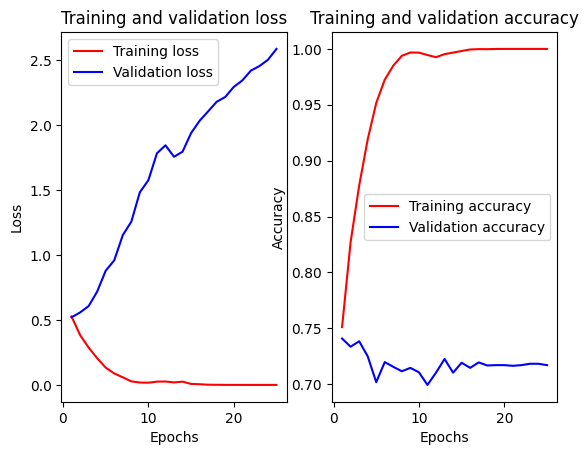

In [103]:
plot_hist_sideways(history_nasnet)

#### MobileNet V2

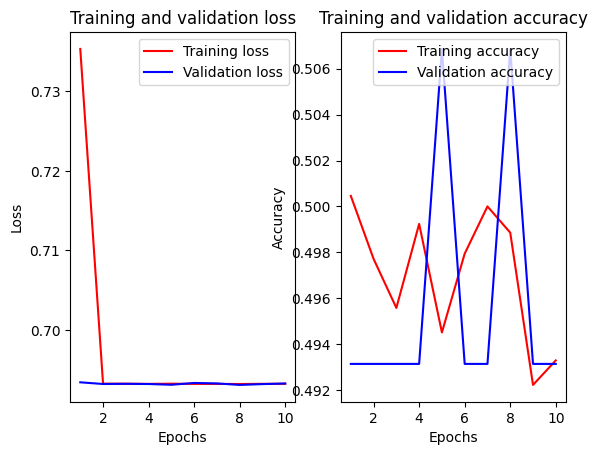

In [104]:
plot_hist_sideways(history_mobile_v2)

#### EfficientNet B0

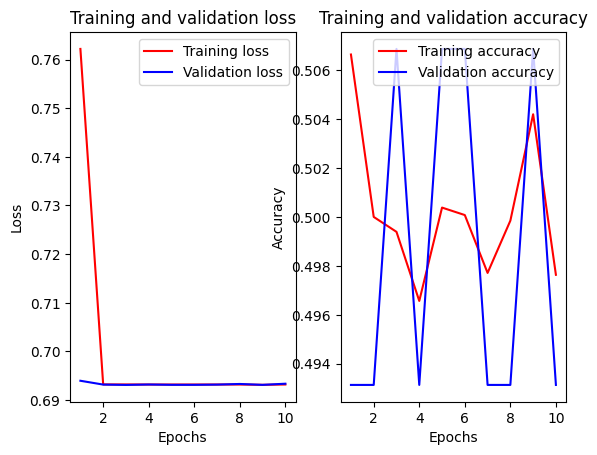

In [105]:
plot_hist_sideways(history_efficient)

## Feature Extraction with multiple passes
Rather than only passing the images through once, we will feed the data through the feature extraction multiple times, we are essentially treating the transfer model as a layer, this allows us to use data augmentation. Since NasNet is way too large for my hardware, I will be using mobilenet and efficient net

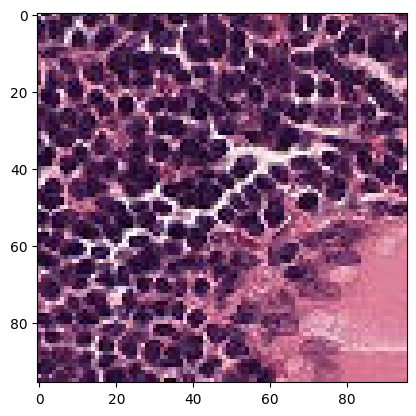

In [106]:
def prep(x):
    return x
imgs, lbs = preprocess_data(train, prep)

img = imgs[3]
plt.imshow(img)

EPOCHS = 25


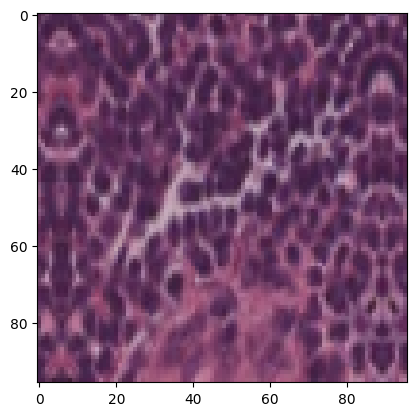

In [107]:
aug_img = augment_layer(flip = "horizontal_and_vertical", rotation=0.5, zoom = 0.4, contrast = 0.5)(img)
plt.imshow(aug_img)

#### MobileNet V2

In [108]:
# Build classifer
inputs = Input(shape = (96, 96, 3))
x = augment_layer(flip = "horizontal_and_vertical", rotation=0.5, zoom = 0.4, contrast = 0.5)(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = mobilev2_ft_extractor(inputs)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
m_mobile_layer = Model(inputs = inputs, outputs = output)

# Compile model
m_mobile_layer.compile(
    optimizer = OPTIMIZER,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

In [109]:
history_mobile_layer = m_mobile_layer.fit(train, validation_data= val, epochs = EPOCHS)

Epoch 1/10
820/820 [==============================] - 134s 158ms/step - loss: 0.4243 - accuracy: 0.8398 - val_loss: 0.4480 - val_accuracy: 0.8053
Epoch 2/10
820/820 [==============================] - 127s 155ms/step - loss: 0.2892 - accuracy: 0.8774 - val_loss: 0.4452 - val_accuracy: 0.8132
Epoch 3/10
820/820 [==============================] - 127s 154ms/step - loss: 0.2476 - accuracy: 0.8967 - val_loss: 0.5530 - val_accuracy: 0.7806
Epoch 4/10
820/820 [==============================] - 125s 152ms/step - loss: 0.2145 - accuracy: 0.9136 - val_loss: 0.5147 - val_accuracy: 0.8026
Epoch 5/10
820/820 [==============================] - 132s 161ms/step - loss: 0.1853 - accuracy: 0.9237 - val_loss: 0.5550 - val_accuracy: 0.7983
Epoch 6/10
820/820 [==============================] - 128s 156ms/step - loss: 0.1625 - accuracy: 0.9339 - val_loss: 0.5498 - val_accuracy: 0.8203
Epoch 7/10
820/820 [==============================] - 124s 151ms/step - loss: 0.1402 - accuracy: 0.9439 - val_loss: 0.7483 -

### EfficientNet B0

In [110]:
# Build classifer
inputs = Input(shape = (96, 96, 3))
x = augment_layer(flip = "horizontal_and_vertical", rotation=0.5, zoom = 0.4, contrast = 0.5)(inputs)
x =  tf.keras.applications.efficientnet.preprocess_input(x)
x = efficient_ft_extractor(inputs)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
m_efficient_layer = Model(inputs = inputs, outputs = output)

# Compile model
m_efficient_layer.compile(
    optimizer = OPTIMIZER,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

In [114]:
history_efficient_layer = m_efficient_layer.fit(train, validation_data = val, epochs = EPOCHS)

Epoch 1/10
 92/820 [==>...........................] - ETA: 3:12 - loss: 0.6933 - accuracy: 0.5014

### Plot results

#### MobileNet

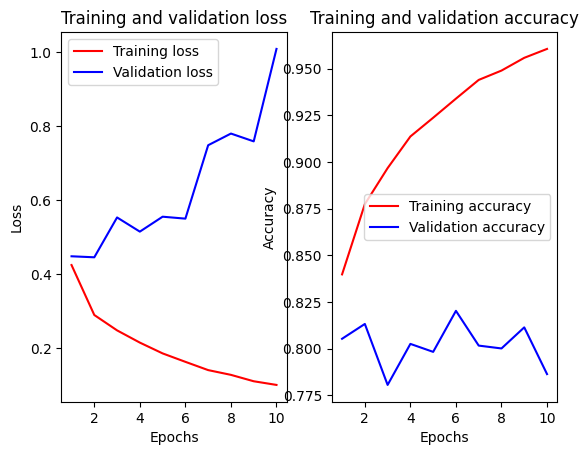

In [ ]:
plot_hist_sideways(history_mobile_layer)

#### EfficientNet

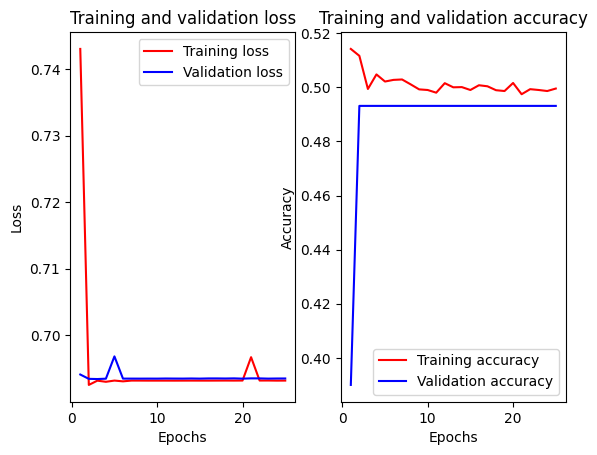

In [ ]:
plot_hist_sideways(history_efficient_layer)